<a href="https://colab.research.google.com/github/AlfredoJc-cyber/ProyectoFinal_DataScienceII/blob/main/EntregaFinalDSII%2BJasaui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------------------------------------------------------------
##***PROYECTO FINAL:*** **ANÁLISIS PREDICTIVO DE ANSIEDAD SOCIAL**

--------------------------------------------------------------------------------

***Estudiante:***  ALFREDO JASAUI CHERO

***Escuela:*** CODERHOUSE

***Curso:*** DATA SCIENCE II

***Comisión:*** 67485

***Profesor:*** GUSTAVO BENITEZ

***Tutor:*** GUILLERMO MALLO

--------------------------------------------------------------------------------
##***CONTENIDOS***

--------------------------------------------------------------------------------
1.  **PRESENTACIÓN**
2.  **PRESENTACIÓN EJECUTIVA**
3.  **LECTURA DE DATOS**
4.  **DATA WRANGLING - LIMPIEZA & TRANSFORMACIÓN DE DATOS**
5.  **ANÁLISIS EXPLORATORIO DE DATOS - EDA**
6.  **FEATURE ENGINEERING - INGENIERÍA DE ATRIBUTOS**
7.  **FEATURE SELECTION**
8.  **PREPROCESAMIENTO DE DATOS**
9.  **MODELADO**
10.  **OPTIMIZACIÓN DE MODELOS**
11.  **CONCLUSIONES FINALES**


## **1. PRESENTACIÓN**

### **1.1. Abstracto con Motivación y Audiencia** ###


La ansiedad social es un trastorno psicológico común que puede limitar la vida personal, académica y/o profesional de quienes la padecen, por lo que representa un desafío creciente en materia de salud mental. Es así como su detección temprana se vuelve clave para prevenir complicaciones emocionales y sociales a largo plazo.

En ese contexto, la motivación en la realización del presente análisis radica en demostrar cómo el modelado y análisis de datos
representan una alternativa eficaz para predecir niveles de ansiedad social con mayor precisión, así como para identificar factores de riesgo determinantes y patrones que puedan no encontrarse a simple vista.

De esta forma, la audiencia que podrá beneficiarse del análisis es la siguiente:

*   Psicólogos, psiquiatras y otros profesionales de la salud mental

*   Clínicas, hospitales y otras instituciones de salud pública y privada

*   Compañías aseguradoras

*   Académicos e investigadores en ciencia de datos y salud mental

*   Áreas de recursos humanos (HR) de empresas

*   Desarrolladores de plataformas y aplicativos digitales de salud

*   Público en general, preocupado por el impacto en ellos y su comunidad

### **1.2. Contexto Analítico & Comercial** ###

La disponibilidad de data sobre ansiedad social brinda oportunidades para generar análisis de carácter descriptivo y predictivo. De este modo, el uso de modelos predictivos como Machine Learning permiten predecir niveles de ansiedad social al transformar grandes volúmenes de datos en información procesable, facilitando así la toma de decisiones informada y anticipada en ámbitos clínicos y psicológicos.

Dicha información podrá ser explotada por profesionales de la salud mental y por las instituciones en las que ejercen; permitiéndoles diseñar estrategias de intervención más efectivas, priorizar casos urgentes e incluso personalizar tratamientos. Asimismo, el análisis automatizado que ofrece un modelo predictivo también favorece la investigación académica y la innovación en salud pública y privada, al optimizar la detección y el manejo de la ansiedad social con un enfoque basado en datos y evidencia. De la misma forma, existe la oportunidad de desarrollar productos tecnológicos de bienestar mental, ya sean softwares o aplicativos que puedan ser adoptados por instituciones de salud, aseguradoras y empleadores para mejorar la satisfacción de sus pacientes, clientes y colaboradores.

### **1.3. Preguntas a Resolver** ###

1. ¿Cómo es la influencia del nivel de estrés sobre el nivel de ansiedad reportado?

2. ¿Puede la cantidad de horas de sueño predecir el nivel de ansiedad de una persona?

3. ¿Existe relación significativa entre la frecuencia cardiaca y los niveles de ansiedad?

4. ¿Qué impacto tienen los hábitos de consumo de cafeína y alcohol, así como la actividad física, en los niveles de ansiedad?

5. ¿Cuál es el efecto combinado del nivel de estrés y de las horas de sueño para con los niveles de ansiedad?

6. ¿En qué medida el consumo de alcohol y la calidad en la dieta se asocian con los niveles de ansiedad?

### **1.4. Objetivo** ###
Construir un modelo de Machine Learning capaz de predecir el nivel de ansiedad (del 1 al 10) de una persona en base a un conjunto de atributos, a través del entrenamiento de un aprendizaje supervisado. Esta es una tarea de regresión, ya que la variable objetivo **('Anxiety Level (1-10)')** es numérica, discreta y ordenada.

## **2. PRESENTACIÓN EJECUTIVA**

**URL**: https://github.com/AlfredoJc-cyber/ProyectoFinal_DataScienceII/blob/main/PresentacionDSII.pdf

## **3. LECTURA DE DATOS**

### **3.1. Importación de Librerías Necesarias** ###


In [ ]:
# Importar librerías para la manipulación, análisis y visualización de datos; incluyendo funciones estadísticas, matemática avanzada, modelado y aprendizaje automático
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import ttest_ind, f_oneway, randint
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.svm import SVR

### **3.2. Configuración del entorno de Python en Google Colab** ###


In [ ]:
# Configuraciones para visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### **3.3. Lectura del Dataset** ###

In [ ]:
url = 'https://raw.githubusercontent.com/AlfredoJc-cyber/ProyectoFinal_DataScienceII/refs/heads/main/enhanced_anxiety_dataset.csv'
df = pd.read_csv(url)
df

,Age,Gender,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5
1,46,Other,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3
2,64,Male,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1
3,20,Female,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2
4,49,Female,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,Female,6.1,3.1,566,9,Yes,No,8,91,28,1,Yes,Yes,1,No,3,6
10996,50,Other,6.6,3.6,64,17,Yes,No,7,95,17,3,No,No,2,No,7,3
10997,29,Male,6.7,6.9,159,14,No,No,8,72,16,1,Yes,Yes,2,Yes,7,4
10998,53,Other,5.7,2.7,248,8,No,No,4,112,28,3,Yes,Yes,1,Yes,2,4


### **3.4. Análisis inicial del Dataset** ###

In [ ]:
# Dimensiones
print("Filas, columnas: ", df.shape)

Filas, columnas:  (11000, 18)


In [ ]:
# Nombres y tipos de datos de las variables
df.info()
#Donde:
  #int64: Numérico (Entero)
  #float64: Numérico (Decimal)
  #object: Categórico (Cadena de texto u otro valor no numérico)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Sleep Hours                        11000 non-null  float64
 3   Physical Activity (hrs/week)       11000 non-null  float64
 4   Caffeine Intake (mg/day)           11000 non-null  int64  
 5   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 6   Smoking                            11000 non-null  object 
 7   Family History of Anxiety          11000 non-null  object 
 8   Stress Level (1-10)                11000 non-null  int64  
 9   Heart Rate (bpm)                   11000 non-null  int64  
 10  Breathing Rate (breaths/min)       11000 non-null  int64  
 11  Sweating Level (1-5)               11000 non-null  int

In [ ]:
# Estadísticas descriptivas de las Variables Numéricas
df.describe(include=[np.number])

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


In [ ]:
# Frecuencia de valores únicos en las Variables Categóricas
for col in df.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df[col].value_counts())


Frecuencia de valores únicos de Gender
Gender
Female    3730
Male      3657
Other     3613
Name: count, dtype: int64

Frecuencia de valores únicos de Smoking
Smoking
Yes    5779
No     5221
Name: count, dtype: int64

Frecuencia de valores únicos de Family History of Anxiety
Family History of Anxiety
Yes    5847
No     5153
Name: count, dtype: int64

Frecuencia de valores únicos de Dizziness
Dizziness
Yes    5672
No     5328
Name: count, dtype: int64

Frecuencia de valores únicos de Medication
Medication
Yes    5666
No     5334
Name: count, dtype: int64

Frecuencia de valores únicos de Recent Major Life Event
Recent Major Life Event
Yes    5623
No     5377
Name: count, dtype: int64


### **3.5. Descripción de Variables** ###

*   **Age:** Edad

*   **Gender:** Género (masculino, femenino u otro)

*   **Sleep hours:** Horas de sueño diarias

*   **Physical activity (hrs/week):** Actividad física (en horas por semana)

*   **Caffeine intake (mg/day):** Ingesta de cafeína (en miligramos diarios)

*   **Alcohol consumption (drinks/week):** Consumo de alcohol (en bebidas por semana)

*   **Smoking:** Fumador (sí o no)

*   **Diet quality (1-10):** Calidad de la dieta (del 1 al 10)

*   **Stress level (1-10):** Nivel de estrés (del 1 al 10)

*   **Heart rate (bpm):** Frecuencia cardíaca (en latidos por minuto)

*   **Breathing rate (breaths/min):** Frecuencia respiratoria (en respiraciones por minuto)

*   **Sweating level (1-5):** Nivel de sudoración (del 1 al 5)

*   **Dizziness:** Sufre de mareos (sí o no)

*   **Family history of anxiety:** Historial de ansiedad en la familia (sí o no)

*   **Medication:** Uso de medicación (sí o no)

*   **Therapy sessions (per month):** Número de sesiones de terapia (al mes)

*   **Recent major life event:** Evento personal importante reciente (sí o no)

*   **Anxiety level (1-10):** Nivel de ansiedad (del 1 al 10)

## **4. DATA WRANGLING - LIMPIEZA & TRANSFORMACIÓN DE DATOS**

### **4.1. Valores Duplicados** ###


In [ ]:
duplicated_rows = df[df.duplicated()]
print("Filas duplicadas encontradas:", len(duplicated_rows))

if not duplicated_rows.empty:
    print("\nPrimeras filas duplicadas:")
    print(duplicated_rows.head())
else:
    print("\nNo existen filas duplicadas en el dataset.")

Filas duplicadas encontradas: 0

No existen filas duplicadas en el dataset.


**Resultado**: Se observa que no existen filas duplicadas en el dataset.

### **4.2. Valores Nulos** ###

In [ ]:
# Contar los valores nulos por columna
df.isnull().sum()

,0
Age,0
Gender,0
Sleep Hours,0
Physical Activity (hrs/week),0
Caffeine Intake (mg/day),0
Alcohol Consumption (drinks/week),0
Smoking,0
Family History of Anxiety,0
Stress Level (1-10),0
Heart Rate (bpm),0


**Resultado**: Se observa que no existen valores nulos en el dataset.


In [ ]:
#¿Podría ser considerado el 0 como valor nulo en alguna(s) columna(s)?
# Se procede a contar cuántos valores 0 hay en cada columna
zero = df == 0
zero.sum().sort_values(ascending=False)

,0
Therapy Sessions (per month),2134
Alcohol Consumption (drinks/week),506
Physical Activity (hrs/week),87
Caffeine Intake (mg/day),4
Gender,0
Age,0
Smoking,0
Family History of Anxiety,0
Stress Level (1-10),0
Sleep Hours,0


**Resultado**: Se observa que las columnas que tienen valores 0 son coherentes, ya que resulta lógico que existan personas con ciertos niveles de ansiedad y que al mismo tiempo:
*   No reciban terapia (0 sesiones por mes)
*   No consuman alcohol (0 tragos por día),
*   No realicen actividad física (0 horas por semana), y/o
*   No consuman cafeína (0 mg por día)

Por lo tanto, **ninguno de estos datos debería ser limpiado** ya que contribuirían al análisis.

### **4.3. Tratamiento de Valores Outliers** ###


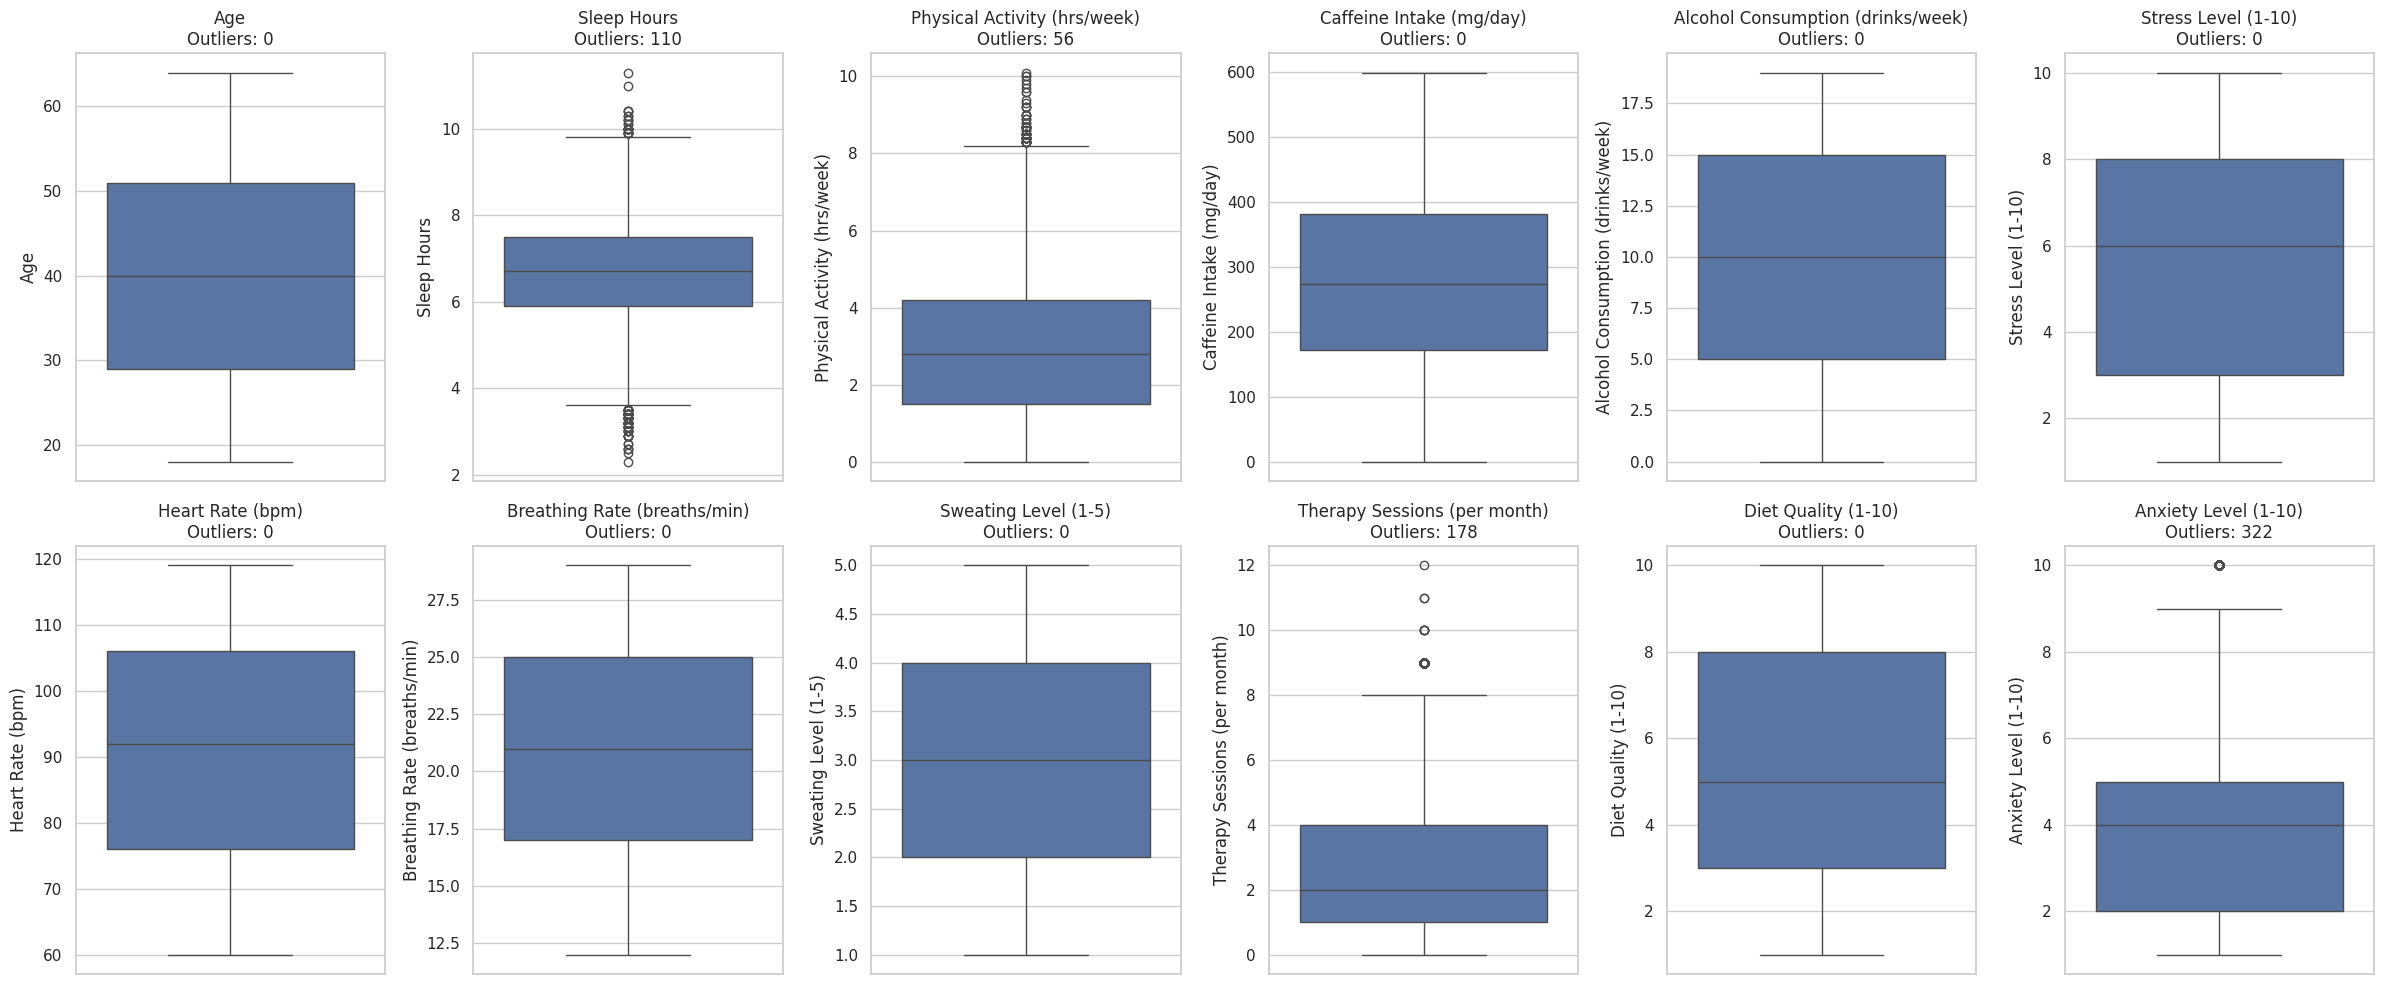

In [ ]:
# Selección de columnas numéricas
variables = df.select_dtypes(include='number').columns.tolist()

# Creación del lienzo
columns = 6
rows = math.ceil(len(variables) / columns)
fig, axes = plt.subplots(rows, columns, figsize=(4 * columns, 5 * rows))
axes = axes.flatten()

# Detección y graficado de outliers
for idx, variable in enumerate(variables):
    data = df[variable].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]

# Diseño de Boxplot
    sns.boxplot(y=variable, data=df, ax=axes[idx])
    axes[idx].set_title(f"{variable}\nOutliers: {len(outliers)}")
    axes[idx].set_xlabel("")

# Eliminar ejes vacíos si hay menos variables que subplots
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Resultados**:

No se detectaron outliers en las siguientes variables (8):

*   **Age:** Edad

*   **Caffeine intake (mg/day):** Ingesta de cafeína (en miligramos diarios)

*   **Alcohol consumption (drinks/week):** Consumo de alcohol (en bebidas por semana)

*   **Diet quality (1-10):** Calidad de la dieta (del 1 al 10)

*   **Stress level (1-10):** Nivel de estrés (del 1 al 10)

*   **Heart rate (bpm):** Frecuencia cardíaca (en latidos por minuto)

*   **Breathing rate (breaths/min):** Frecuencia respiratoria (en respiraciones por minuto)

*   **Sweating level (1-5):** Nivel de sudoración (del 1 al 5)

Respecto a las variables con outliers (4), los outliers resultan útiles e interesantes para el análisis, motivo por el cual **ninguno debería ser eliminado**. A continuación el sustento de ello para cada una de las variables:

*   **Sleep hours:** Horas de sueño diarias

      ** Se percibe algunas personas con pocas horas de sueño, y algunas otras con muchas horas de sueño


*   **Physical activity (hrs/week):** Actividad física (en horas por semana)

      ** Se percibe algunas personas que realizan actividad física por encima de 8 - 9 horas semanales


*   **Therapy sessions (per month):** Número de sesiones de terapia (al mes)

      ** Se percibe algunas personas que tienen más de 10 sesiones de terapia al mes

*   **Anxiety level (1-10):** Nivel de ansiedad (del 1 al 10)

      ** Se percibe algunas personas con ansiedad muy alta, de 10 o muy cerca

## **5. ANÁLISIS EXPLORATORIO DE DATOS - EDA**

### **5.1. Análisis Univariado** ###


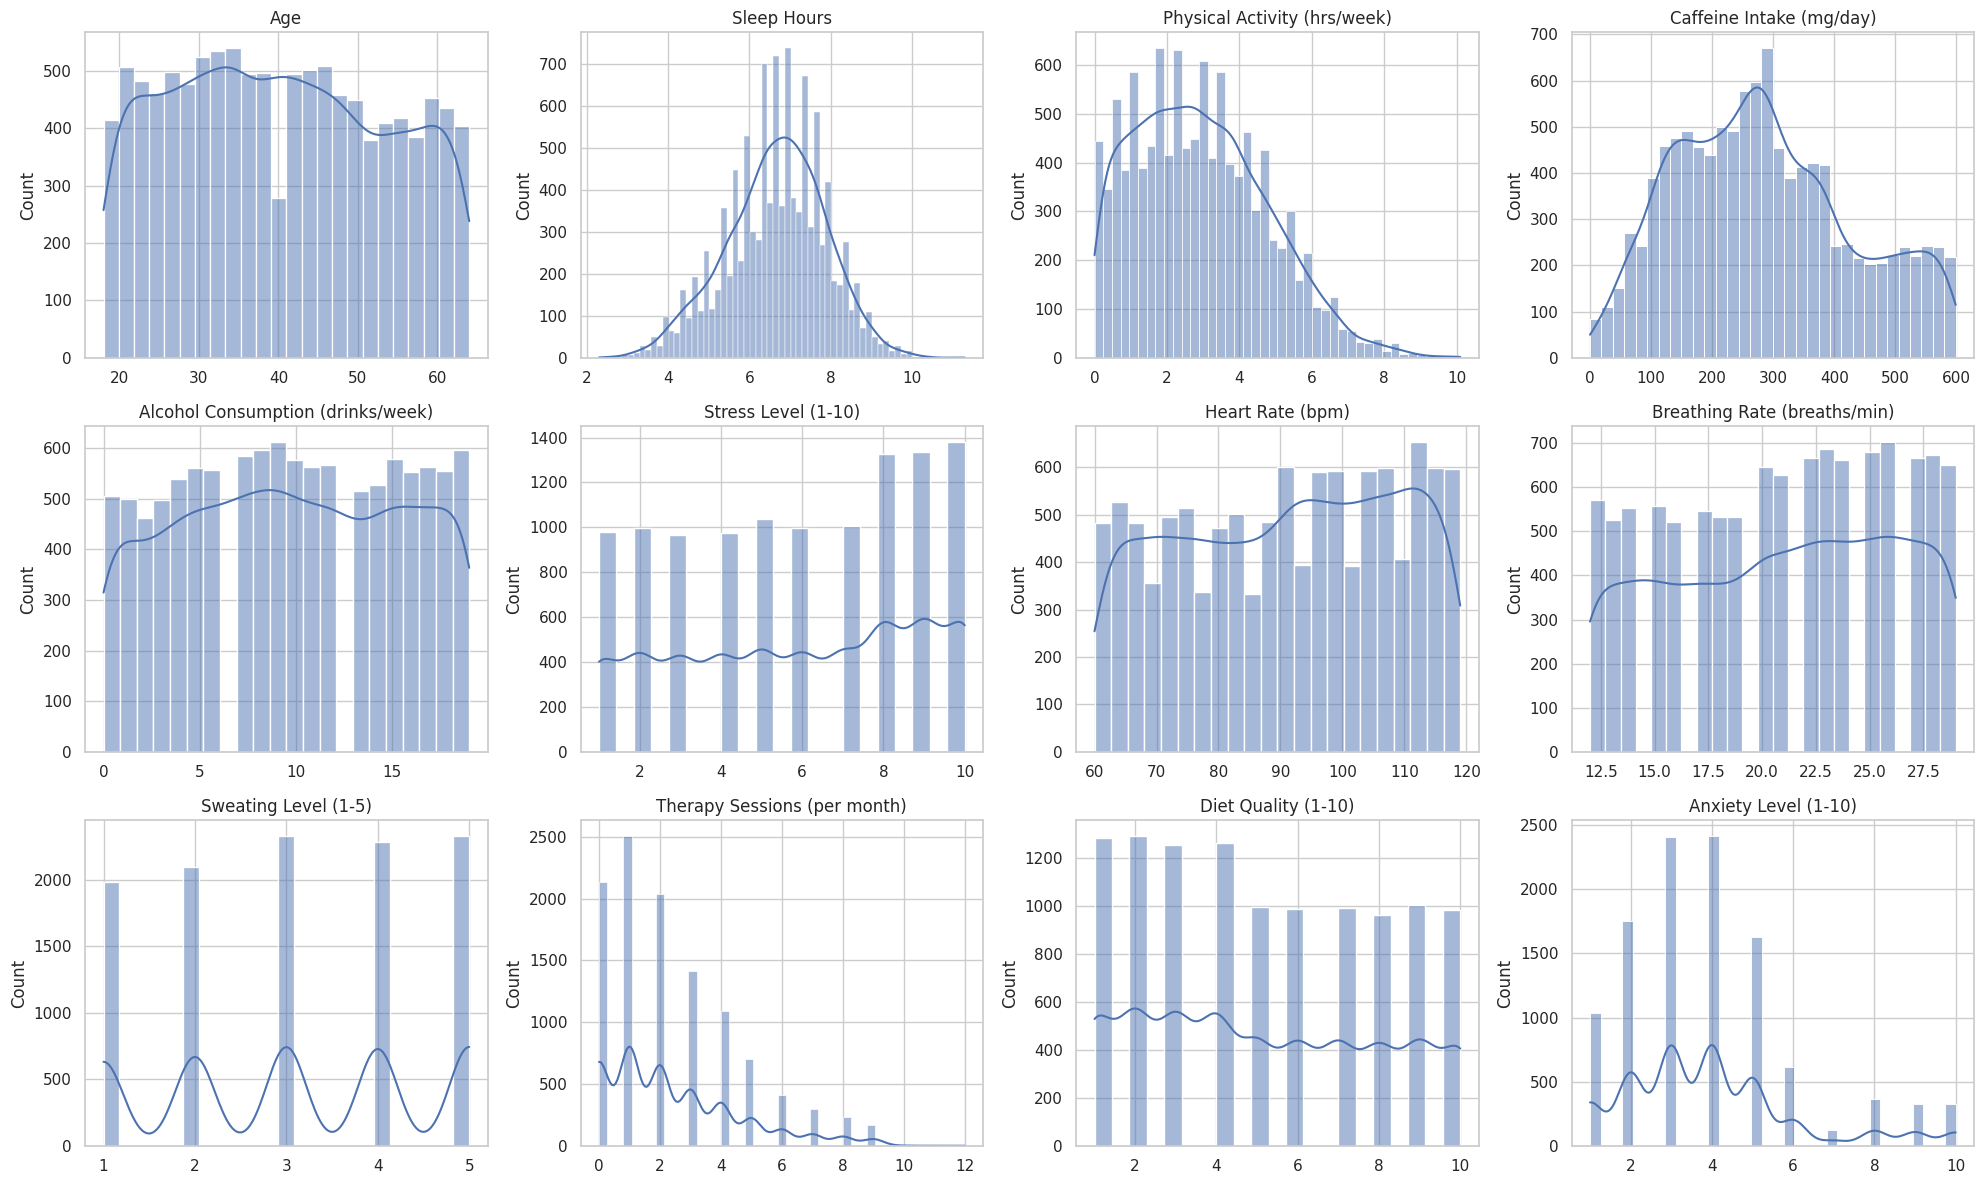

In [ ]:
# ANÁLISIS DE VARIABLES NUMÉRICAS

# Detectar automáticamente las columnas numéricas
variables = df.select_dtypes(include='number').columns.tolist()

# Número de columnas por fila
columns = 4
# Número de filas necesarias
rows = math.ceil(len(variables) / columns)

# Crear la figura con subplots
fig, axes = plt.subplots(rows, columns, figsize=(5 * columns, 4 * rows))
axes = axes.flatten()  # Aplanar para facilitar el acceso

# Graficar histograma para cada variable
for idx, variable in enumerate(variables):
    sns.histplot(df[variable], ax=axes[idx], kde=True)
    axes[idx].set_title(variable)
    axes[idx].set_xlabel("")

# Ocultar ejes vacíos si hay más subplots que variables
for idx in range(len(variables), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

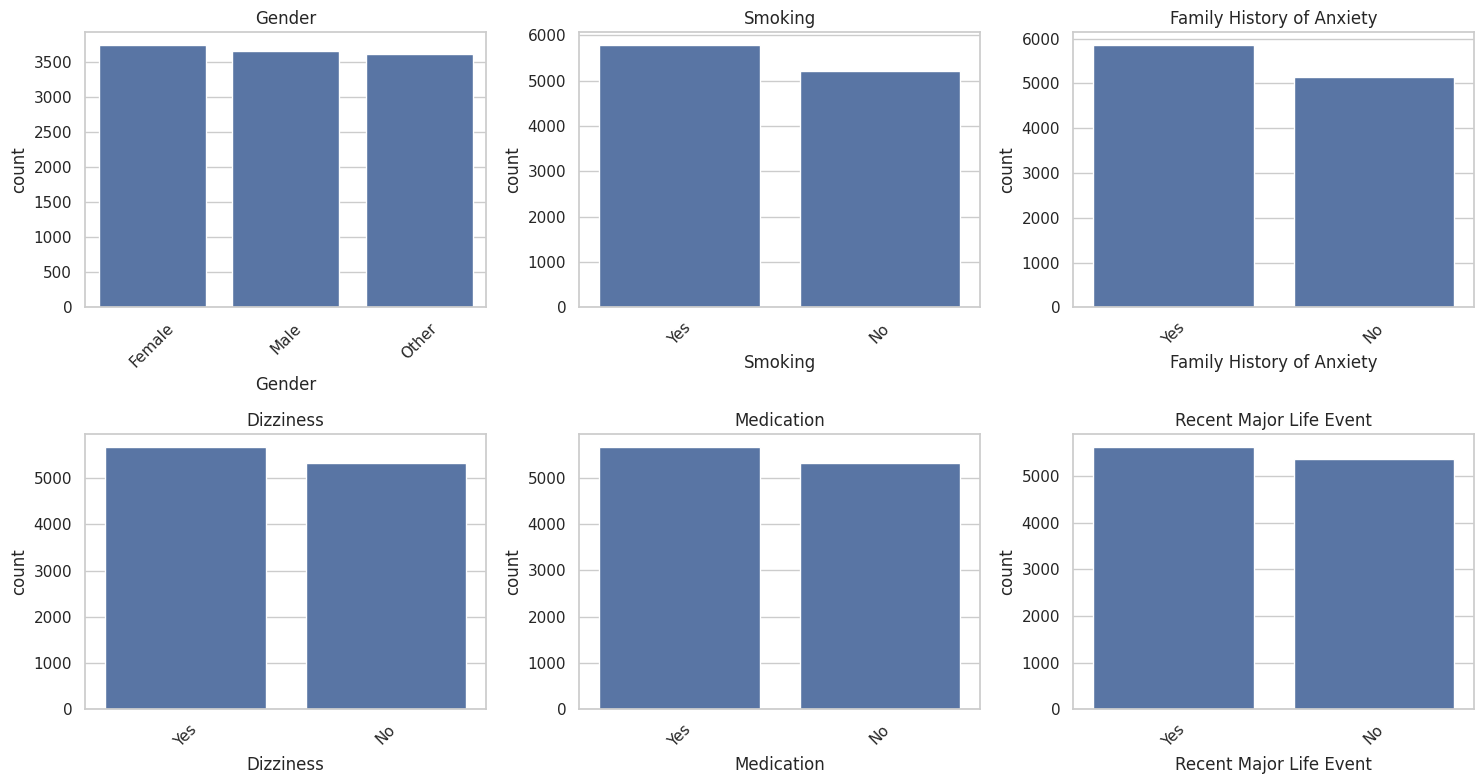

In [ ]:
# ANÁLISIS DE VARIABLES CATEGÓRICAS

# Detectar automáticamente columnas categóricas (6)
variables_cat = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Número de columnas por fila
columns = 3
# Número de filas necesarias
rows = math.ceil(len(variables_cat) / columns)

# Crear figura con subplots
fig, axes = plt.subplots(rows, columns, figsize=(5 * columns, 4 * rows))
axes = axes.flatten()

# Graficar cada variable categórica como gráfico de barras
for idx, variable in enumerate(variables_cat):
    sns.countplot(data=df, x=variable, ax=axes[idx], order=df[variable].value_counts().index)
    axes[idx].set_title(variable)
    axes[idx].tick_params(axis='x', rotation=45)  # Opcional: rotar etiquetas si son largas

# Ocultar ejes vacíos si hay más subplots que variables
for idx in range(len(variables_cat), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

### **5.2. Análisis Bivariado** ###

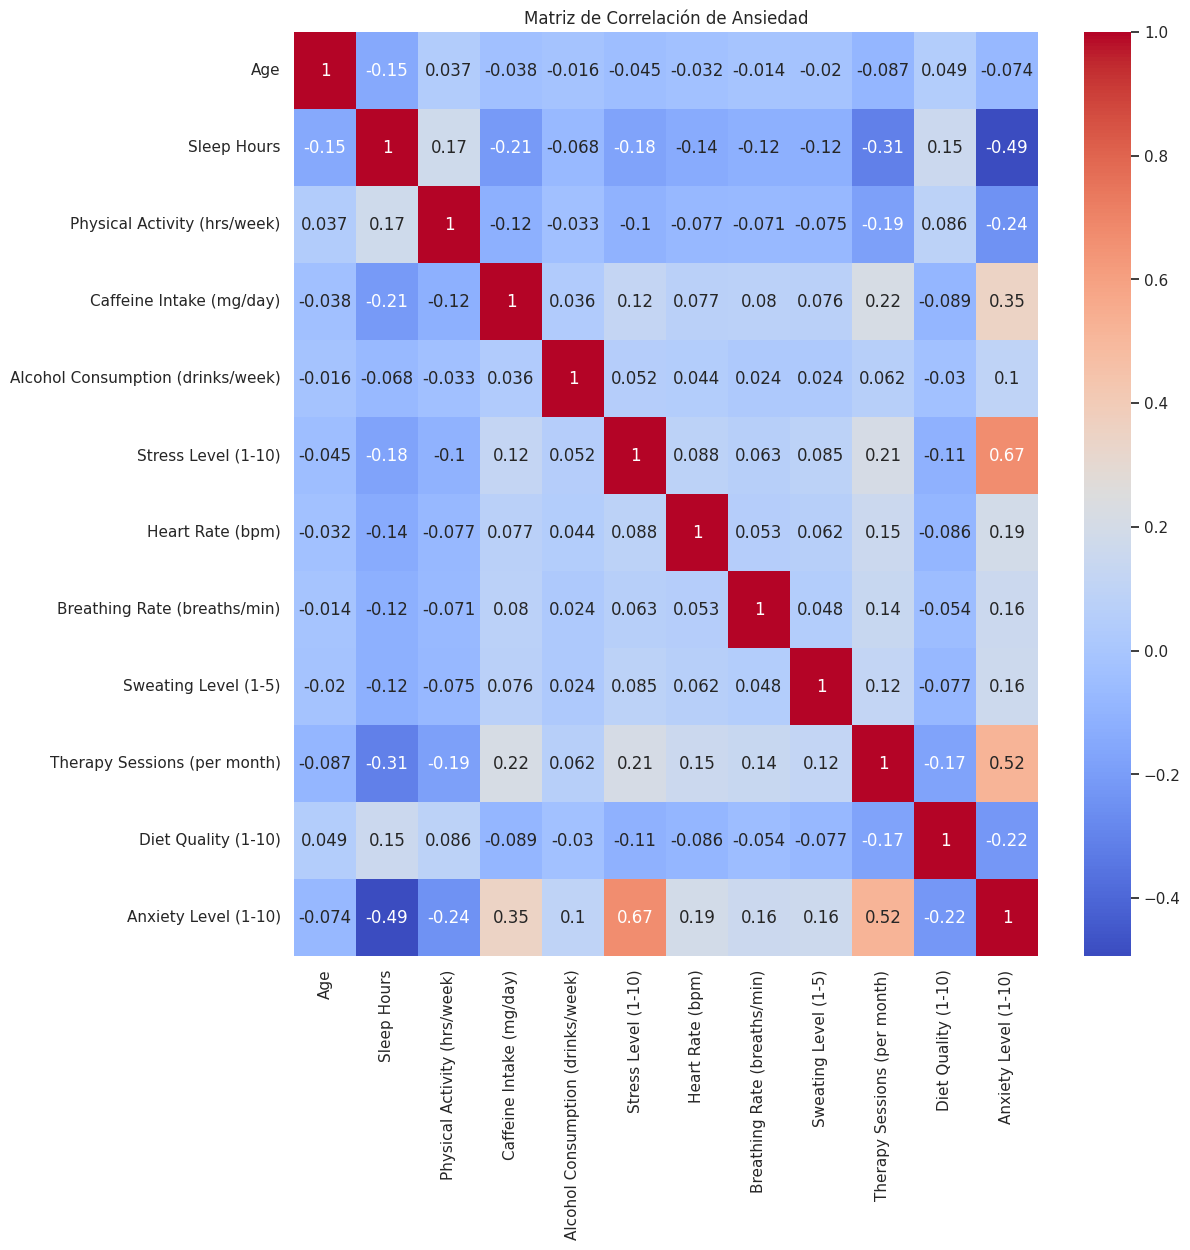

In [ ]:
# MATRIZ DE CORRELACIÓN

# Seleccionar solo columnas numéricas
df_numericas = df.select_dtypes(include='number')

# Matriz de correlación
correlation_matrix = df_numericas.corr()

# Mapa de calor
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Ansiedad')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

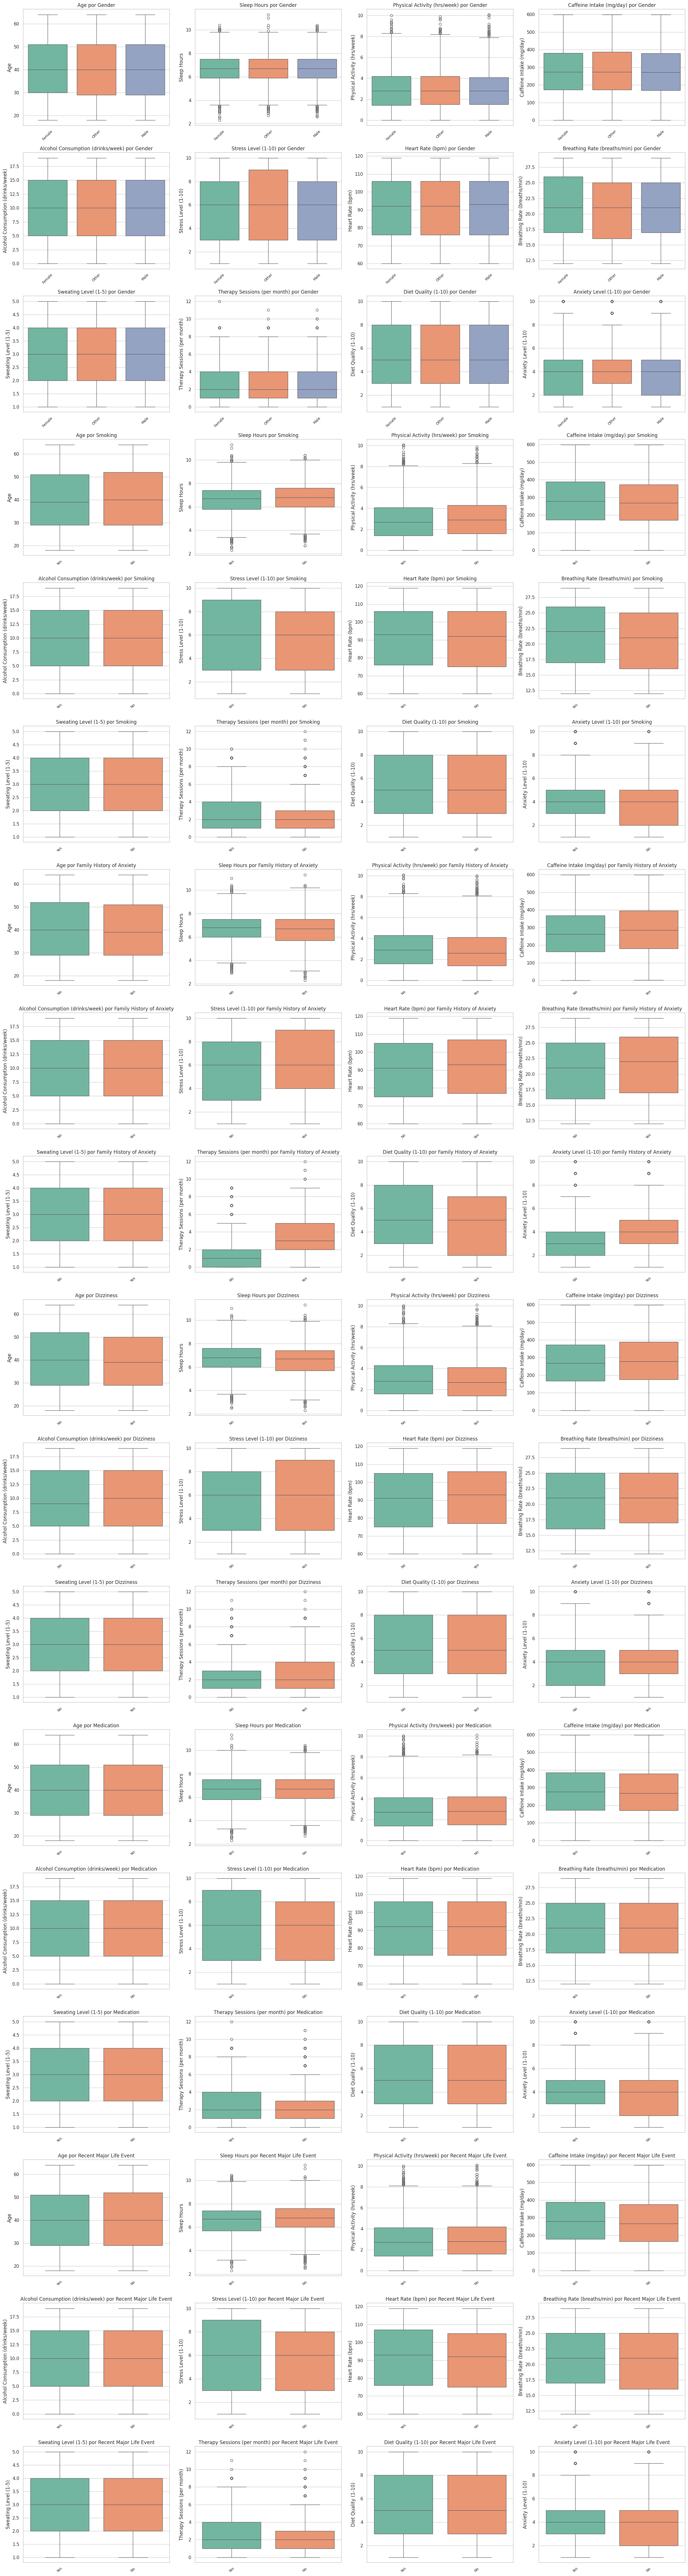

In [ ]:
# BOXPLOTS COMPARATIVOS

# Detectar variables
cat_vars = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
num_vars = df.select_dtypes(include='number').columns.tolist()

# Crear lista de combinaciones (numérica vs categórica)
combinaciones = [(cat, num) for cat in cat_vars for num in num_vars]

# Tamaño de figura y subplots
n = len(combinaciones)
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten()

for i, (cat, num) in enumerate(combinaciones):
    ax = axes[i]
    sns.boxplot(x=cat, y=num, hue=cat, data=df, palette='Set2', ax=ax)
    ax.set_title(f'{num} por {cat}', fontsize=12)
    ax.tick_params(axis='x', labelrotation=45, labelsize=9)
    ax.set_xlabel("")
    if ax.get_legend():
        ax.get_legend().remove()

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.tight_layout()
plt.show()

### **5.3. Análisis Multivariado** ###

In [ ]:
#GRÁFICO DE DISPERSIÓN 3D: RELACIÓN DE LA ANSIEDAD EN FUNCIÓN DEL ESTRÉS Y EL SUEÑO

import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Variables independientes y dependiente
X = df[['Stress Level (1-10)', 'Sleep Hours']]
y = df['Anxiety Level (1-10)']

# Ajuste del modelo
model = LinearRegression()
model.fit(X, y)

# Predicciones para el plano (versión sin advertencia)
x_surf = np.linspace(X['Stress Level (1-10)'].min(), X['Stress Level (1-10)'].max(), 10)
y_surf = np.linspace(X['Sleep Hours'].min(), X['Sleep Hours'].max(), 10)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

# Crear DataFrame con nombres de columnas para evitar el warning
input_df = pd.DataFrame({
    'Stress Level (1-10)': x_surf.ravel(),
    'Sleep Hours': y_surf.ravel()
})
z_surf = model.predict(input_df).reshape(x_surf.shape)

# Gráfico interactivo con Plotly
fig = go.Figure()

# Scatter plot de los datos originales
fig.add_trace(go.Scatter3d(
    x=df['Stress Level (1-10)'],
    y=df['Sleep Hours'],
    z=df['Anxiety Level (1-10)'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['Anxiety Level (1-10)'],  # Puedes usar otra variable si prefieres
        colorscale='Viridis',
        opacity=0.8
    ),
    name='Datos'
))

# Plano de regresión
fig.add_trace(go.Surface(
    z=z_surf,
    x=x_surf,
    y=y_surf,
    colorscale='Oranges',
    opacity=0.7,
    showscale=False,
    name='Plano de regresión'
))

# Etiquetas y diseño
fig.update_layout(
    title="Regresión 3D: Ansiedad en función del Estrés y el Sueño",
    scene=dict(
        xaxis_title="Nivel de estrés",
        yaxis_title="Horas de sueño",
        zaxis_title="Nivel de ansiedad"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

In [ ]:
#GRÁFICO DE DISPERSIÓN 3D: RELACIÓN DE LA ANSIEDAD EN FUNCIÓN DEL CONSUMO DE ALCOHOL Y LA CALIDAD EN LA DIETA

import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Variables independientes y dependiente (usa nombres exactos con mayúsculas)
X = df[['Diet Quality (1-10)', 'Alcohol Consumption (drinks/week)']]
y = df['Anxiety Level (1-10)']

# Ajuste del modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Crear malla de puntos para el plano
x_surf = np.linspace(X['Diet Quality (1-10)'].min(), X['Diet Quality (1-10)'].max(), 10)
y_surf = np.linspace(X['Alcohol Consumption (drinks/week)'].min(), X['Alcohol Consumption (drinks/week)'].max(), 10)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

# Crear DataFrame para predecir Z
input_df = pd.DataFrame({
    'Diet Quality (1-10)': x_surf.ravel(),
    'Alcohol Consumption (drinks/week)': y_surf.ravel()
})
z_surf = model.predict(input_df).reshape(x_surf.shape)

# Crear gráfico 3D interactivo con Plotly
fig = go.Figure()

# Scatter plot de los datos originales
fig.add_trace(go.Scatter3d(
    x=df['Diet Quality (1-10)'],
    y=df['Alcohol Consumption (drinks/week)'],
    z=df['Anxiety Level (1-10)'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['Anxiety Level (1-10)'],  # Puedes cambiar el color según otra variable si lo deseas
        colorscale='Viridis',
        opacity=0.8
    ),
    name='Datos'
))

# Plano de regresión
fig.add_trace(go.Surface(
    z=z_surf,
    x=x_surf,
    y=y_surf,
    colorscale='Oranges',
    opacity=0.7,
    showscale=False,
    name='Plano de regresión'
))

# Etiquetas y diseño del gráfico
fig.update_layout(
    title="Regresión 3D: Ansiedad en función del Consumo de Alcohol y la Calidad en la Dieta",
    scene=dict(
        xaxis_title="Calidad de la Dieta",
        yaxis_title="Alcohol (bebidas/semana)",
        zaxis_title="Nivel de Ansiedad"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Mostrar gráfico
fig.show()

### **5.4. Conclusiones del EDA** ###

1. La mayoría de variables muestra distribuciones razonables y balanceadas en la data, sin outliers extremadamente atípicos o anómalos.

2. El nivel de estrés y las horas de sueño son las variables que tienen relación más fuerte con la ansiedad. Un alto nivel de estrés está fuertemente asociado con una mayor ansiedad (correlación positiva de 0.67), mientras que dormir menos horas se asocia con un aumento de la ansiedad (correlación negativa de -0.49). Esto sugiere que gestionar el estrés y asegurar un sueño adecuado resultan estrategias clave para manejar los niveles de ansiedad.

3. Factores de estilo de vida como la dieta, la actividad física, el consumo de alcohol y de cafeína muestran una correlación muy débil o casi nula con la ansiedad. Aunque la actividad física y una mejor dieta tienen una ligera tendencia a asociarse con menor ansiedad (correlaciones negativas de -0.24 y -0.22, respectivamente), el impacto no es tan significativo como el del estrés o el sueño.

4. El número de sesiones mensuales de terapia tiene una correlación positiva moderada (0.52) con el nivel de ansiedad. Esto no implica que asistir a terapia genere ansiedad, lo más probable es que las personas con mayores niveles de ansiedad sean quienes asistan a terapia con más frecuencia.

5. Existe una relación conjunta entre el consumo de alcohol, la calidad en la dieta y el nivel de ansiedad, donde tanto el aumento del consumo de alcohol como una menor calidad en la dieta contribuyen a un mayor nivel de ansiedad, tanto en conjunto como de forma independiente.


## **6. FEATURE ENGINEERING - INGENIERÍA DE ATRIBUTOS**

Se optó por generar dos variables nuevas con el fin de enriquecer el dataset y darle mayor valor:
*   Physiological Arousal Index (Índice de Estimulación Fisiológica)
*   Total Stimulant Consumption (Consumo Total de Estimulantes)



In [ ]:
 #1. Primera Nueva Variable: Physiological Arousal Index (Índice de Estimulación Fisiológica)

# 1.1. Seleccionar las columnas fisiológicas
fisiologicas = ['Heart Rate (bpm)',
                'Breathing Rate (breaths/min)',
                'Sweating Level (1-5)']

# 1.2. Estandarizar las columnas: Esto transforma cada columna/variable para que tenga media 0 y desviación estándar 1, permitiendo compararlas en una misma escala, ya que tienen unidades distintas
scaler = StandardScaler()
fisiologicas_std = scaler.fit_transform(df[fisiologicas])

# 1.3. Crear la nueva variable sumando las columnas estandarizadas
df['Physiological Arousal Index'] = fisiologicas_std.sum(axis=1)

# ------------------------------
# 2. Segunda Nueva Variable: Total Stimulant Consumption (Consumo Total de Estimulantes)

# 2.1. Escalar el alcohol para que tenga una magnitud comparable a la cafeína
alcohol_factor = 14  # un vaso de bebida alcohólica puede contener hasta 14 mg de alcohol según la OMS (Organización Mundial de la Salud) y el  NIAAA (National Institute on Alcohol Abuse and Alcoholism)
df['Total Stimulant Consumption'] = df['Caffeine Intake (mg/day)'] + (df['Alcohol Consumption (drinks/week)'] * alcohol_factor)

# 2.2 Visualizar las nuevas  variables en el dataset
print(df[['Physiological Arousal Index', 'Total Stimulant Consumption']].head())

   Physiological Arousal Index  Total Stimulant Consumption
0                     0.641265                          321
1                    -2.045743                          312
2                     1.312053                          173
3                    -1.108384                          444
4                     0.686757                          303


## **7. FEATURE SELECTION**

### **7.1. Ranking de importancia de las variables dependientes** ###

In [ ]:
#SE APLICÓ UN RANKING DE IMPORTANCIA DE LAS VARIABLES DEPENDIENTES EN LA PREDICCIÓN DE LA VARIABLE OBJETIVO

X = df.drop('Anxiety Level (1-10)', axis=1)
y = df['Anxiety Level (1-10)']

num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)


X_processed = preprocessor.fit_transform(X)

encoder = preprocessor.named_transformers_["cat"]
encoded_cat_features = encoder.get_feature_names_out(cat_features)
all_feature_names = num_features + list(encoded_cat_features)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_processed, y)

importances = pd.DataFrame({
    "Variable": all_feature_names,
    "Importancia (Peso)": model.feature_importances_
}).sort_values(by="Importancia (Peso)", ascending=False)

importances["Importancia (%)"] = (importances["Importancia (Peso)"] * 100).round(2)

print("Ranking de Importancia de Variables:")
print(importances)

Ranking de Importancia de Variables:
                             Variable  Importancia (Peso)  Importancia (%)
5                 Stress Level (1-10)            0.467628            46.76
1                         Sleep Hours            0.217846            21.78
9        Therapy Sessions (per month)            0.092547             9.25
3            Caffeine Intake (mg/day)            0.033972             3.40
11        Physiological Arousal Index            0.024977             2.50
12        Total Stimulant Consumption            0.023228             2.32
2        Physical Activity (hrs/week)            0.023160             2.32
6                    Heart Rate (bpm)            0.019969             2.00
10                Diet Quality (1-10)            0.019483             1.95
0                                 Age            0.019354             1.94
7        Breathing Rate (breaths/min)            0.013957             1.40
4   Alcohol Consumption (drinks/week)            0.013458      

### **7.2. Selección final y Dataset reducido** ###

Se decidió excluir las variables con un nivel de importancia menor al 1%, pues la diferencia entre su peso y el de las variables principales (las que encabezan el ranking) justifica su pérdida de relevancia para el modelo.

In [ ]:
cols_keep = [
    "Stress Level (1-10)",
    "Sleep Hours",
    "Therapy Sessions (per month)",
    "Caffeine Intake (mg/day)",
    "Physiological Arousal Index",
    "Total Stimulant Consumption",
    "Physical Activity (hrs/week)",
    "Heart Rate (bpm)",
    "Diet Quality (1-10)",
    "Age",
    "Breathing Rate (breaths/min)",
    "Alcohol Consumption (drinks/week)",
    "Anxiety Level (1-10)"
]

df = df[cols_keep]

df

,Stress Level (1-10),Sleep Hours,Therapy Sessions (per month),Caffeine Intake (mg/day),Physiological Arousal Index,Total Stimulant Consumption,Physical Activity (hrs/week),Heart Rate (bpm),Diet Quality (1-10),Age,Breathing Rate (breaths/min),Alcohol Consumption (drinks/week),Anxiety Level (1-10)
0,10,6.0,3,181,0.641265,321,2.7,114,7,29,14,10,5
1,1,6.2,2,200,-2.045743,312,5.7,62,8,46,23,8,3
2,1,5.0,1,117,1.312053,173,3.7,91,1,64,28,4,1
3,4,5.8,0,360,-1.108384,444,2.8,86,1,20,17,6,2
4,1,8.2,1,247,0.686757,303,2.3,98,3,49,19,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,8,6.1,1,566,-0.117730,692,3.1,91,3,23,28,9,6
10996,7,6.6,2,64,-0.588902,302,3.6,95,7,50,17,17,3
10997,8,6.7,2,159,-3.540054,355,6.9,72,7,29,16,14,4
10998,4,5.7,1,248,2.524179,360,2.7,112,2,53,28,8,4


## **8. PREPROCESAMIENTO DE DATOS**

In [ ]:
# Definir las variables independientes (eje X) y la variable objetivo (eje Y)
X = df.drop('Anxiety Level (1-10)', axis=1)
y = df['Anxiety Level (1-10)']
categorical_features_for_encoding = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features_for_scaling = X.select_dtypes(include=['int64', 'float64']).columns.difference(categorical_features_for_encoding).tolist()

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_for_scaling),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_for_encoding)
    ],
    remainder='passthrough'  # O 'drop'
)

## **9. MODELADO**

### **9.1. División de Datos (en conjuntos de entrenamiento y prueba)** ###



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (8800, 12)
Tamaño del conjunto de prueba (X_test): (2200, 12)
Tamaño del conjunto de entrenamiento (y_train): (8800,)
Tamaño del conjunto de prueba (y_test): (2200,)


### **9.2. Construcción, Entrenamiento y Evaluación de Modelos** ###

De acuerdo al planteamiento del objetivo expuesto en el Capítulo 1 (Presentación), los modelos a desarrollar y evaluar corresponden a la tarea de **Regresión**.

En tal sentido, los modelos de regresión seleccionados (4) para su evaluación fueron los siguientes:

*   **Regresión Lineal**: Encuentra la recta que mejor explique la relación entre las variable
*   **Regresión Ridge**: Variante de la regresión lineal que evita overfitting penalizando los coeficientes
*   **Random Forest**: Combina múltiples árboles de decisión sobre muestras aleatorias para lograr predicciones más precisas y estables
*   **Gradient Boosting**: Construye árboles de forma secuencial, corrigiendo los errores del random forest

Para la construcción, entrenamiento y evaluación de cada modelo, se optó por el uso de **Pipelines** debido al flujo de trabajo secuencial y automatizado que éstos garantizan durante todo el proceso.

#### **9.2.1. Modelo 1: Regresión Lineal** ####

In [ ]:
# Construcción
model_pipeline_linear = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
# Entrenamiento
model_pipeline_linear.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Stress Level (1-10)',
                                                   'Sleep Hours',
                                                   'Therapy Sessions (per '
                                                   'month)',
                                                   'Caffeine Intake (mg/day)',
                                                   'Physiological Arousal '
                                                   'Index',
                                                   'Total Stimulant '
                                                   'Consumption',
                                                   'Physical Activity '
                                                   '(hrs/week)',
                                                   'Heart Rate (bpm)',
                                                   'Diet Quality (1-10)', 'Age',
                                                   'Breathing Rate '
                                                   '(breaths/min)',
                                                   'Alcohol Consumption '
                                                   '(drinks/week)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('regressor', LinearRegression())])

In [ ]:
# Predicción con conjunto de prueba
y_pred_linear = model_pipeline_linear.predict(X_test)

In [ ]:
#Evaluación
mse_linear  = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear  = mean_absolute_error(y_test, y_pred_linear)
r2_linear   = r2_score(y_test, y_pred_linear)

print("--- Métricas de Evaluación del Modelo de Regresión Lineal---")
print(f"Error Absoluto Medio (MAE): {mae_linear:.6f}")
print(f"Error Cuadrático Medio (MSE): {mse_linear:.6f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_linear:.6f}")
print(f"Coeficiente de Determinación (R²): {r2_linear:.6f}")

--- Métricas de Evaluación del Modelo de Regresión Lineal---
Error Absoluto Medio (MAE): 0.894744
Error Cuadrático Medio (MSE): 1.272558
Raíz del Error Cuadrático Medio (RMSE): 1.128077
Coeficiente de Determinación (R²): 0.725368


#### **9.2.2. Modelo 2: Regresión Ridge** ####

In [ ]:
# Construcción del pipeline
model_pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0, random_state=42))
    # alpha controla la regularización (cuanto más alto, más penaliza)
])

In [ ]:
# Entrenamiento
model_pipeline_ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Stress Level (1-10)',
                                                   'Sleep Hours',
                                                   'Therapy Sessions (per '
                                                   'month)',
                                                   'Caffeine Intake (mg/day)',
                                                   'Physiological Arousal '
                                                   'Index',
                                                   'Total Stimulant '
                                                   'Consumption',
                                                   'Physical Activity '
                                                   '(hrs/week)',
                                                   'Heart Rate (bpm)',
                                                   'Diet Quality (1-10)', 'Age',
                                                   'Breathing Rate '
                                                   '(breaths/min)',
                                                   'Alcohol Consumption '
                                                   '(drinks/week)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('regressor', Ridge(random_state=42))])

In [ ]:
# Predicción con conjunto de prueba
y_pred_ridge = model_pipeline_ridge.predict(X_test)

In [ ]:
# Evaluación
mse_ridge  = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge  = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge   = r2_score(y_test, y_pred_ridge)

print("--- Métricas de Evaluación del Modelo de Regresión Ridge---")
print(f"Error Absoluto Medio (MAE): {mae_ridge:.6f}")
print(f"Error Cuadrático Medio (MSE): {mse_ridge:.6f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_ridge:.6f}")
print(f"Coeficiente de Determinación (R²): {r2_ridge:.6f}")

--- Métricas de Evaluación del Modelo de Regresión Ridge---
Error Absoluto Medio (MAE): 0.894743
Error Cuadrático Medio (MSE): 1.272552
Raíz del Error Cuadrático Medio (RMSE): 1.128075
Coeficiente de Determinación (R²): 0.725369


#### **9.2.3. Modelo 3: Random Forest** ####

In [ ]:
# Construcción
model_pipeline_randomf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor
      (n_estimators=100,
       random_state=42,
       n_jobs=-1,
       max_depth=10,
       min_samples_split=5)
      )
])

In [ ]:
# Entrenamiento
model_pipeline_randomf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Stress Level (1-10)',
                                                   'Sleep Hours',
                                                   'Therapy Sessions (per '
                                                   'month)',
                                                   'Caffeine Intake (mg/day)',
                                                   'Physiological Arousal '
                                                   'Index',
                                                   'Total Stimulant '
                                                   'Consumption',
                                                   'Physical Activity '
                                                   '(hrs/week)',
                                                   'Heart Rate (bpm)',
                                                   'Diet Quality (1-10)', 'Age',
                                                   'Breathing Rate '
                                                   '(breaths/min)',
                                                   'Alcohol Consumption '
                                                   '(drinks/week)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_split=5,
                                       n_jobs=-1, random_state=42))])

In [ ]:
# Predicción con conjunto de prueba
y_pred_randomf = model_pipeline_randomf.predict(X_test)

In [ ]:
#Evaluación
mse_randomf  = mean_squared_error(y_test, y_pred_randomf)
rmse_randomf = np.sqrt(mean_squared_error(y_test, y_pred_randomf))
mae_randomf  = mean_absolute_error(y_test, y_pred_randomf)
r2_randomf   = r2_score(y_test, y_pred_randomf)

print("--- Métricas de Evaluación del Modelo Random Forest---")
print(f"Error Absoluto Medio (MAE): {mae_randomf:.6f}")
print(f"Error Cuadrático Medio (MSE): {mse_randomf:.6f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_randomf:.6f}")
print(f"Coeficiente de Determinación (R²): {r2_randomf:.6f}")

--- Métricas de Evaluación del Modelo Random Forest---
Error Absoluto Medio (MAE): 0.814277
Error Cuadrático Medio (MSE): 1.018432
Raíz del Error Cuadrático Medio (RMSE): 1.009174
Coeficiente de Determinación (R²): 0.780211


#### **9.2.4. Modelo 4: Gradient Boosting** ####

In [ ]:
# Construcción del pipeline
model_pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

In [ ]:
# Entrenamiento
model_pipeline_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Stress Level (1-10)',
                                                   'Sleep Hours',
                                                   'Therapy Sessions (per '
                                                   'month)',
                                                   'Caffeine Intake (mg/day)',
                                                   'Physiological Arousal '
                                                   'Index',
                                                   'Total Stimulant '
                                                   'Consumption',
                                                   'Physical Activity '
                                                   '(hrs/week)',
                                                   'Heart Rate (bpm)',
                                                   'Diet Quality (1-10)', 'Age',
                                                   'Breathing Rate '
                                                   '(breaths/min)',
                                                   'Alcohol Consumption '
                                                   '(drinks/week)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [ ]:
# Predicción
y_pred_gb = model_pipeline_gb.predict(X_test)

In [ ]:
#Evaluación
mse_gb  = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb  = mean_absolute_error(y_test, y_pred_gb)
r2_gb   = r2_score(y_test, y_pred_gb)

print("--- Métricas de Evaluación del Modelo Gradient Boosting---")
print(f"Error Absoluto Medio (MAE): {mae_gb:.6f}")
print(f"Error Cuadrático Medio (MSE): {mse_gb:.6f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_gb:.6f}")
print(f"Coeficiente de Determinación (R²): {r2_gb:.6f}")

--- Métricas de Evaluación del Modelo Gradient Boosting---
Error Absoluto Medio (MAE): 0.821425
Error Cuadrático Medio (MSE): 1.040597
Raíz del Error Cuadrático Medio (RMSE): 1.020096
Coeficiente de Determinación (R²): 0.775428


#### **9.2.5. Conclusiones del Modelado** ####

In [ ]:
#Tabulación de los resultados de los cuatro modelos
data = {
    "Regresión Lineal": {
        "MAE": 0.894744,
        "MSE": 1.272558,
        "RMSE": 1.128077,
        "R²": 0.725368
    },
    "Random Forest": {
        "MAE": 0.814277,
        "MSE": 1.018432,
        "RMSE": 1.009174,
        "R²": 0.780211
    },
    "Regresión Ridge": {
        "MAE": 0.894743,
        "MSE": 1.272552,
        "RMSE": 1.128075,
        "R²": 0.725369
    },
    "Gradient Boosting": {
        "MAE": 0.821425,
        "MSE": 1.040597,
        "RMSE": 1.020096,
        "R²": 0.775428
    }
}

resultados = pd.DataFrame(data)
print(resultados)

      Regresión Lineal  Random Forest  Regresión Ridge  Gradient Boosting
MAE           0.894744       0.814277         0.894743           0.821425
MSE           1.272558       1.018432         1.272552           1.040597
RMSE          1.128077       1.009174         1.128075           1.020096
R²            0.725368       0.780211         0.725369           0.775428


**Entonces,** según las métricas obtenidas, el modelo **más conveniente** para predecir es el **Random Forest** por los siguientes motivos:

*   Cuenta con el menor error absoluto medio (MAE), por lo que es el modelo que predice los valores reales con mayor cercanía
*   Cuenta con el menor error cuadrático medio (MSE), por lo que es el modelo que minimiza el impacto de los errores grandes en las predicciones
*   Cuenta con la menor raíz del error cuadrático medio (RMSE), por lo que es el modelo que presenta la menor cantidad de errores significativos, ofreciendo predicciones más consistentes y confiables
*   Cuenta con el mayor coeficiente de determinación (R²), por lo que es el modelo que explica mejor la variabilidad de los datos, reflejando la mayor capacidad de representar el comportamiento real y otorgar sentido a los cambios observados

Por el contrario, el modelo **menos conveniente** es el de **Regresión Lineal**, ya que presenta los valores más altos de MAE, MSE y RMSE; junto con el menor R².

## **10. OPTIMIZACIÓN DE MODELOS**

Se procede a desarrollar con el mejor modelo, que en este caso fue **Random Forest**.

#### **10.1. Validación Cruzada (Cross Validation)** ####

In [ ]:
# Se aplica K-Fold al considerarse un dataset pequeño (<15,000 registros)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores_r2 = cross_val_score(model_pipeline_randomf, X, y, cv=kf, scoring='r2')
scores_mae = cross_val_score(model_pipeline_randomf, X, y, cv=kf, scoring='neg_mean_absolute_error')
scores_mse = cross_val_score(model_pipeline_randomf, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convertir las métricas de error a valores positivos
scores_mae = -scores_mae
scores_mse = -scores_mse
scores_rmse = np.sqrt(scores_mse)

print("--- Resultados Cross Validation (Random Forest) ---")
print(f"MAE promedio: {scores_mae.mean():.6f}  (± {scores_mae.std():.6f})")
print(f"MSE promedio: {scores_mse.mean():.6f}  (± {scores_mse.std():.6f})")
print(f"RMSE promedio:{scores_rmse.mean():.6f}  (± {scores_rmse.std():.6f})")
print(f"R² promedio:  {scores_r2.mean():.6f}  (± {scores_r2.std():.6f})")

--- Resultados Cross Validation (Random Forest) ---
MAE promedio: 0.820668  (± 0.017326)
MSE promedio: 1.042942  (± 0.045075)
RMSE promedio:1.021005  (± 0.022150)
R² promedio:  0.768194  (± 0.012823)


In [ ]:
# Tabulación Comparativa del resultado del modelo original con la validación cruzada
data = {
    "Métrica": ["MAE", "MSE", "RMSE", "R²"],
    "Modelo Original": [0.814277, 1.018432, 1.009174, 0.780211],
    "Validación Cruzada": [0.820668, 1.042942, 1.021005, 0.768194],
    "Margen CV": [0.017326, 0.045075, 0.022150, 0.012823]
}

resultados = pd.DataFrame(data)
print(resultados)

  Métrica  Modelo Original  Validación Cruzada  Margen CV
0     MAE         0.814277            0.820668   0.017326
1     MSE         1.018432            1.042942   0.045075
2    RMSE         1.009174            1.021005   0.022150
3      R²         0.780211            0.768194   0.012823


#### **10.2. Ajuste de Hiperparámetros (con RandomizedSearchCV)** ####

In [ ]:
# Definición del modelo y de los parámetros aleatorios
param_dist = {
    'regressor__n_estimators': randint(50, 200),
    'regressor__max_depth': [5, 10, None],
    'regressor__min_samples_split': randint(2, 20),
    'regressor__min_samples_leaf': randint(1, 10),
    'regressor__max_features': ['sqrt']
}

# Definición de las métricas
scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error, greater_is_better=False),
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                        greater_is_better=False)
}

# Aplicación de RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_pipeline_randomf,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=2,
    scoring=scoring,
    refit='r2'
)

random_search.fit(X, y)

# Resultados
print("MEJORES HIPERPARÁMETROS:")
print(random_search.best_params_)

print(f"MEJOR R²: {random_search.best_score_:.6f}")

cv_results = random_search.cv_results_

best_index = random_search.best_index_
print("MAE promedio:", -cv_results['mean_test_mae'][best_index])
print("MSE promedio:", -cv_results['mean_test_mse'][best_index])
print("RMSE promedio:", -cv_results['mean_test_rmse'][best_index])

Fitting 3 folds for each of 5 candidates, totalling 15 fits
MEJORES HIPERPARÁMETROS:
{'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 16, 'regressor__n_estimators': 156}
MEJOR R²: 0.768540
MAE promedio: 0.8252299466179945
MSE promedio: 1.0419981705461694
RMSE promedio: 1.0206292965778614


In [ ]:
# Tabulación Comparativa del resultado del modelo original con el ajuste de hiperparámetros
data = {
    "Métrica": ["MAE", "MSE", "RMSE", "R²"],
    "Modelo Original": [0.814277, 1.018432, 1.009174, 0.780211],
    "Ajuste de Hiperparámetros": [0.8252299466179944, 1.0419981705461694, 1.0206292965778614, 0.768540]
}
tabla_comparativa = pd.DataFrame(data)
print(tabla_comparativa)

  Métrica  Modelo Original  Ajuste de Hiperparámetros
0     MAE         0.814277                   0.825230
1     MSE         1.018432                   1.041998
2    RMSE         1.009174                   1.020629
3      R²         0.780211                   0.768540


#### **10.3. Conclusiones sobre la Optimización** ####

*   Al comparar los resultados del modelo original con los de la Validación Cruzada (CV), se observa un ligero incremento en las métricas de error (MAE, MSE y RMSE), mientras que el coeficiente de determinación (R²) presenta una disminución mínima. Este comportamiento trasmite que el modelo mantiene su capacidad predictiva al aplicarse a subconjuntos distintos (splits) del dataset, evidenciando estabilidad y generalización adecuadas.

*   Con respecto al Ajuste de Hiperparámetros, el modelo fue entrenado 15 veces para comparar las 5 configuraciones con 3 particiones, resultando como mejores hiperparámetros los siguientes:
    *   **max_depth=None** → Árboles de decisión sin profundidad máxima, creciendo hasta que otras condiciones lo detengan.
    *   **max_features='sqrt'** → Considerar sólo la raíz cuadrada del número total de variables en cada división.
    *   **min_samples_leaf=4** → Cada hoja con al menos 4 observaciones, evitando que los árboles de decisión generen hojas muy pequeñas que generen overfitting.
    *   **min_samples_split=16** → Un nodo con al menos 16 muestras para  dividirse y controlar el overfitting.
    *   **n_estimators=156** → Construir 156 árboles de decisión en el bosque. A mayor número de árboles, más estable el modelo.

      En base a esto último, el Ajuste de Hiperparámetros muestra resultados similares en métricas, indicando en este caso que, bajo los parámetros optimizados, el modelo no experimentó mejoras significativas en su desempeño, sugiriendo que la configuración original del modelo ya venía demostrando un funcionamiento óptimo.

*   En conjunto, ambos modelos de optimización evidencian que el modelo Random Forest presenta un rendimiento robusto, estable y generalizable, con un riesgo limitado de overfitting, manteniendo su capacidad predictiva sin variaciones relevantes.

## **11. CONCLUSIONES FINALES**

1.   Se demostró que los valores en cero del dataset que son coherentes con la realidad, por lo que no resultó necesario limpiarlos.

2.   Los outliers identificados representan casos de interés, por lo que mantenerlos permitió capturar escenarios reales y extremos que aportaron a la comprensión del fenómeno de la ansiedad social.

3. La ansiedad aumenta cuando el estrés es alto y/o el sueño insuficiente, siendo estas últimas las variables con las que más se relaciona de manera positiva y negativa respectivamente. Asimismo, son el estrés y el sueño las variables que lideran el ranking de importancia al momento de predecir la ansiedad de una persona.

4.   El modelo Random Forest se consolida como la mejor opción para predecir la ansiedad frente a los otros tres modelos de regresión analizados. Al presentar los menores errores (MAE, MSE, RMSE) y el mayor R², se sustenta que predice con mayor precisión y explica mejor la variabilidad de los datos.

5.   Los métodos de optimización confirman la confiabilidad, estabilidad, generabilidad y bajo riesgo de overfitting del modelo Random Forest. La Validación Cruzada evidencia poca variación en las métricas, mientras que el Ajuste de Hiperparámetros al no generar mejoras significativas, indica que la configuración del modelo original ya era óptima.






